Мы получили набор данных о действиях пользователей. Наша задача - провести разведочный анализ данных, чтобы получить представление о структуре и характеристиках данных. Кроме того, необходимо провести RFM-сегментацию пользователей, чтобы разделить их на группы в зависимости от их поведения и характеристик. Это позволит нам лучше понять потребности и предпочтения наших пользователей и разработать более эффективные стратегии маркетинга и продаж.

In [1]:
# Импортируем библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Загружаем датафрейм
df = pd.read_csv('sales_data.csv')
data = df.copy()

In [3]:
# Посмотрим на данные 
data.head()

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Price,Unit Cost
0,SO - 000101,In-Store,WARE-UHY1004,12/31/2017,5/31/2018,6/14/2018,6/19/2018,USD,6,15,259,12,5,0.075,1963.1,1001.181
1,SO - 000102,Online,WARE-NMK1003,12/31/2017,5/31/2018,6/22/2018,7/2/2018,USD,14,20,196,27,3,0.075,3939.6,3348.660
2,SO - 000103,Distributor,WARE-UHY1004,12/31/2017,5/31/2018,6/21/2018,7/1/2018,USD,21,16,213,16,1,0.050,1775.5,781.220
3,SO - 000104,Wholesale,WARE-NMK1003,12/31/2017,5/31/2018,6/2/2018,6/7/2018,USD,28,48,107,23,8,0.075,2324.9,1464.687
4,SO - 000105,Distributor,WARE-NMK1003,4/10/2018,5/31/2018,6/16/2018,6/26/2018,USD,22,49,111,26,8,0.100,1822.4,1476.144


In [4]:
print(f'Размерность данного датафрейма составялет {df.shape[0]} строк и {df.shape[1]} столбцов')

Размерность данного датафрейма составялет 7991 строк и 16 столбцов


In [5]:
# Рассмотрим есть ли у нас пропуски в данных
data.isna().mean()

OrderNumber         0.0
Sales Channel       0.0
WarehouseCode       0.0
ProcuredDate        0.0
OrderDate           0.0
ShipDate            0.0
DeliveryDate        0.0
CurrencyCode        0.0
_SalesTeamID        0.0
_CustomerID         0.0
_StoreID            0.0
_ProductID          0.0
Order Quantity      0.0
Discount Applied    0.0
Unit Price          0.0
Unit Cost           0.0
dtype: float64

In [6]:
# Отформатируем названия столбцов в более удобный вид
data.columns = data.columns.str.lower().str.replace('_', '').str.replace(' ', '_')
data.rename(columns={'ordernumber': 'order_number', 
                     'saleschannel': 'sales_channel',
                     'warehousecode': 'warehouse_code',
                     'procureddate': 'procured_date',
                     'orderdate': 'order_date',
                     'shipdate': 'ship_date',
                     'deliverydate': 'delivery_date',
                     'currencycode': 'currency_code',
                     'salesteamid': 'sales_team_id',
                     'customerid': 'customer_id',
                     'storeid': 'store_id',
                     'productid': 'product_id',
                     'orderquantity': 'order_quantity',
                     'discountapplied': 'discount_applied',
                     'unitprice': 'unit_price',
                     'unitcost': 'unit_cost'
                     }, inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7991 entries, 0 to 7990
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_number      7991 non-null   object 
 1   sales_channel     7991 non-null   object 
 2   warehouse_code    7991 non-null   object 
 3   procured_date     7991 non-null   object 
 4   order_date        7991 non-null   object 
 5   ship_date         7991 non-null   object 
 6   delivery_date     7991 non-null   object 
 7   currency_code     7991 non-null   object 
 8   sales_team_id     7991 non-null   int64  
 9   customer_id       7991 non-null   int64  
 10  store_id          7991 non-null   int64  
 11  product_id        7991 non-null   int64  
 12  order_quantity    7991 non-null   int64  
 13  discount_applied  7991 non-null   float64
 14  unit_price        7991 non-null   float64
 15  unit_cost         7991 non-null   float64
dtypes: float64(3), int64(5), object(8)
memory 

In [8]:
# Переведем столбцы с датами из строкового формата в формат даты
data[['procured_date', 'order_date', 'ship_date', 'delivery_date']] = data[['procured_date', 'order_date', 'ship_date', 'delivery_date']]\
.apply(lambda x: pd.to_datetime(x,format='%m/%d/%Y'))

data[['procured_date', 'order_date', 'ship_date', 'delivery_date']] = data[['procured_date', 'order_date', 'ship_date', 'delivery_date']]\
.apply(lambda x: x.dt.strftime('%Y-%m-%d'))

data[['procured_date', 'order_date', 'ship_date', 'delivery_date']] = data[['procured_date', 'order_date', 'ship_date', 'delivery_date']]\
.apply(lambda x: pd.to_datetime(x))

In [9]:
data[['procured_date', 'order_date', 'ship_date', 'delivery_date']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7991 entries, 0 to 7990
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   procured_date  7991 non-null   datetime64[ns]
 1   order_date     7991 non-null   datetime64[ns]
 2   ship_date      7991 non-null   datetime64[ns]
 3   delivery_date  7991 non-null   datetime64[ns]
dtypes: datetime64[ns](4)
memory usage: 249.8 KB


In [10]:
# На каждый заказ рассчитаем прибыль с учетом скидки
data['revenue'] = data['unit_price'] *(1-data['discount_applied']) - data['unit_cost']

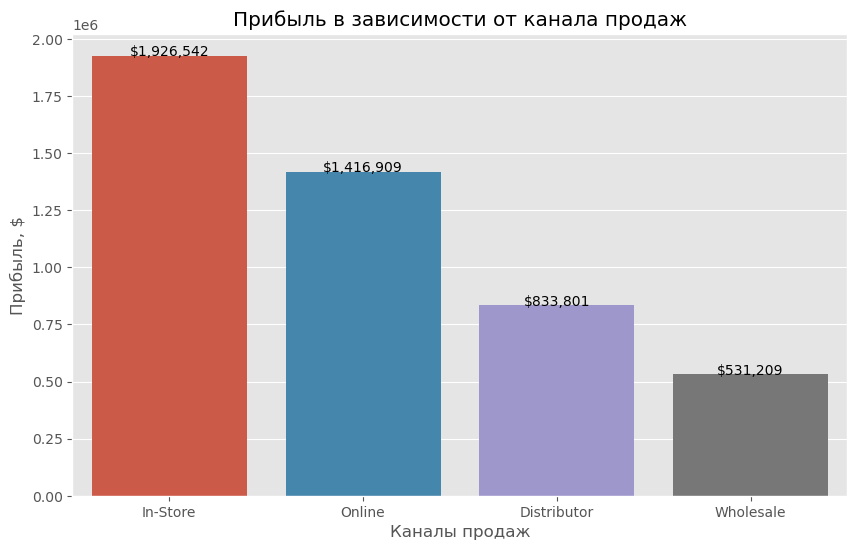

In [11]:
# Проведем анализ продаж по каналам 
sales_channels = data.groupby(['sales_channel'], as_index=False)['revenue'].agg('sum').sort_values(by='revenue', ascending=False)

plt.style.use('ggplot')
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='sales_channel', y='revenue', data=sales_channels)

for i, v in enumerate(sales_channels['revenue']):
    barplot.text(i, v+200, '${:,.0f}'.format(v), ha='center')

plt.title('Прибыль в зависимости от канала продаж')

plt.xlabel('Каналы продаж')
plt.ylabel('Прибыль, $')

plt.show()

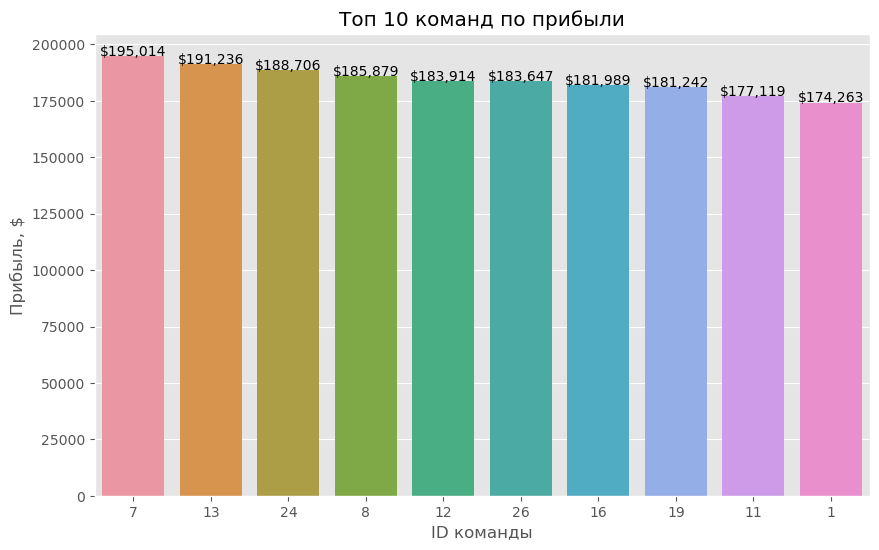

In [12]:
#  Рассмотрим наиболее успешные команды по продаже

sales_team_channels = data.groupby('sales_team_id')['revenue'].sum().reset_index()
most_sales_team_channels = sales_team_channels.nlargest(10, 'revenue')
most_sales_team_channels['sales_team_id'] = most_sales_team_channels['sales_team_id'].astype(str)

plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='sales_team_id', y='revenue', data=most_sales_team_channels)

for i, v in enumerate(most_sales_team_channels['revenue']):
    barplot.text(i, v+200, '${:,.0f}'.format(v), ha='center')

plt.title('Топ 10 команд по прибыли')

plt.xlabel('ID команды')
plt.ylabel('Прибыль, $')

plt.show()

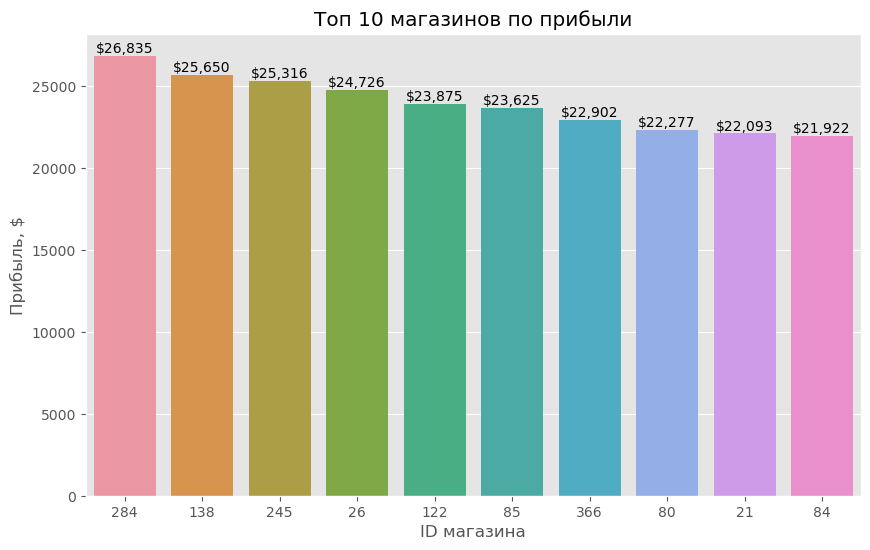

In [13]:
# Наиболее успешные по сумме продаж магазины

stores = data.groupby(['store_id'], as_index=False)['revenue'].agg('sum')
best_stores = stores.sort_values('revenue', ascending=False).head(10)
best_stores['store_id'] = best_stores['store_id'].astype(str)

plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='store_id', y='revenue', data=best_stores)

for i, v in enumerate(best_stores['revenue']):
    barplot.text(i, v+200, '${:,.0f}'.format(v), ha='center')

plt.title('Топ 10 магазинов по прибыли')

plt.xlabel('ID магазина')
plt.ylabel('Прибыль, $')

plt.show()

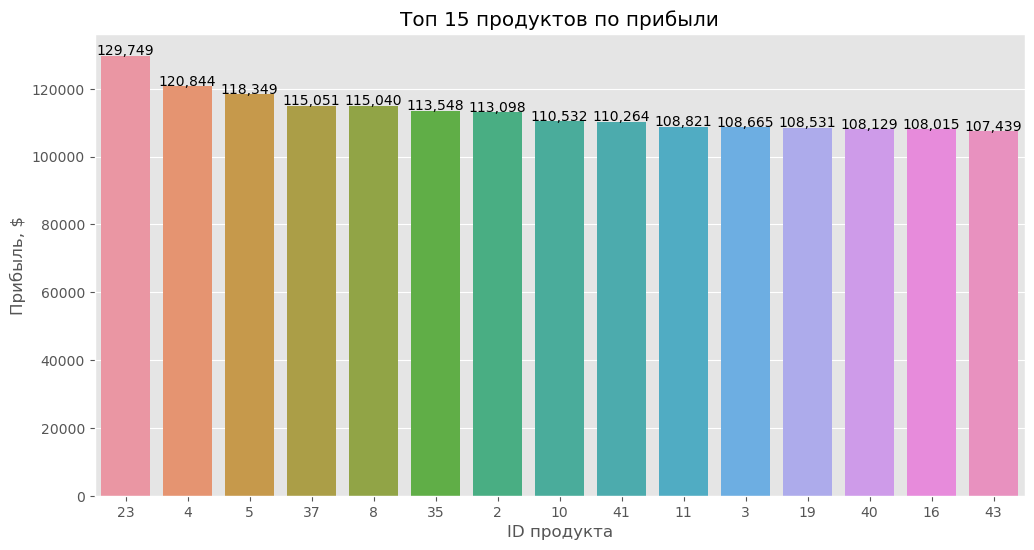

In [14]:
# Рассмотрим 15 лучших продуктов

products = data.groupby(['product_id'], as_index=False)['revenue'].agg('sum')
best_products = products.sort_values('revenue', ascending=False).head(15)
best_products['product_id'] = best_products['product_id'].astype(str)

plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='product_id', y='revenue', data=best_products)

for i, v in enumerate(best_products['revenue']):
    barplot.text(i, v+200, '{:,.0f}'.format(v), ha='center')

plt.title('Топ 15 продуктов по прибыли')

plt.xlabel('ID продукта')
plt.ylabel('Прибыль, $')

plt.show()

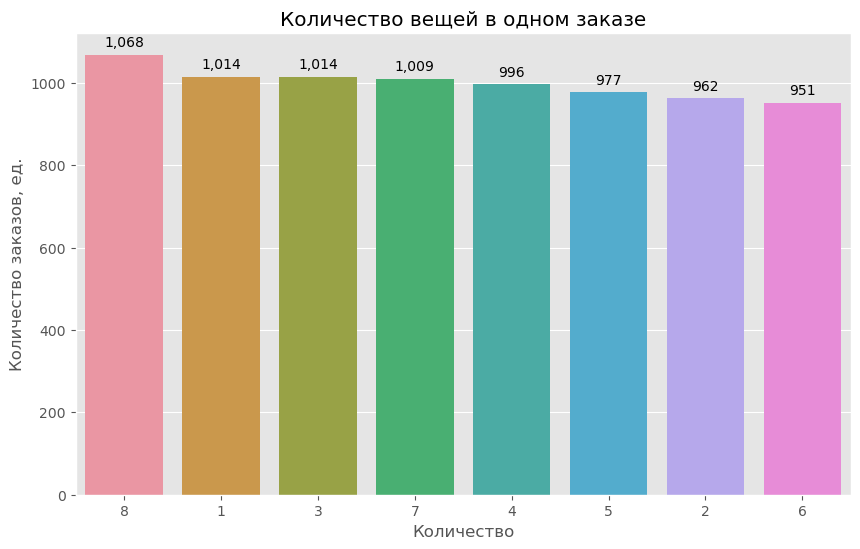

In [15]:
# Количество продуктов в одном заказе

quantity = data.groupby(['order_quantity'], as_index=False)['order_number'].nunique()
most_quantity = quantity.sort_values('order_number', ascending=False)
most_quantity['order_quantity'] = most_quantity['order_quantity'].astype(str)

plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='order_quantity', y='order_number', data=most_quantity)

for i, v in enumerate(most_quantity['order_number']):
    barplot.text(i, v+20, '{:,.0f}'.format(v), ha='center')

plt.title('Количество вещей в одном заказе')

plt.xlabel('Количество')
plt.ylabel('Количество заказов, ед.')

plt.show()


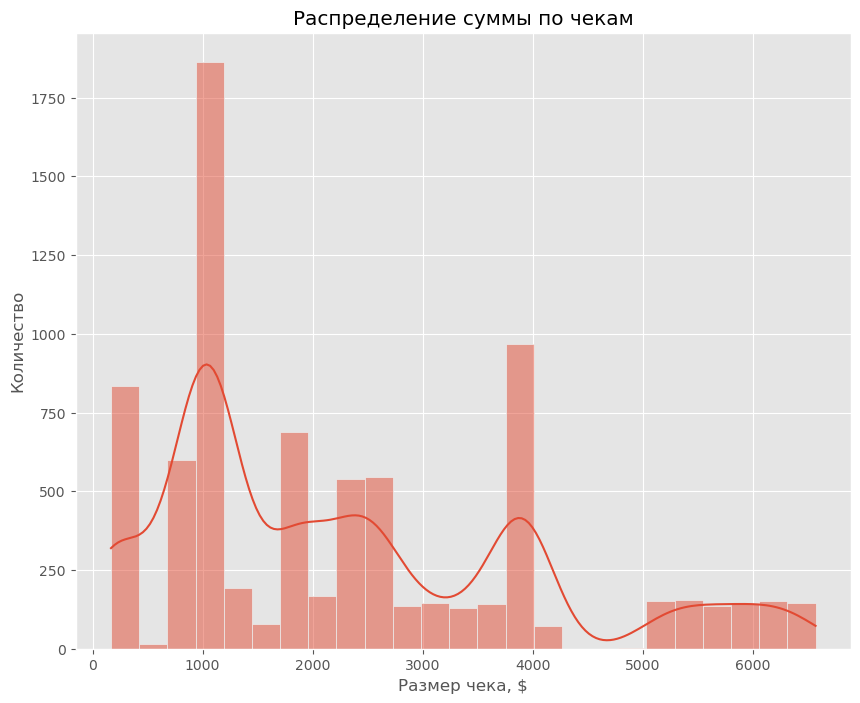

In [16]:
# Рассмотрим расспределение по чекам
plt.figure(figsize=(10, 8))
sns.histplot(data=data,
             x='unit_price',
             alpha=0.5,
             kde=True)

plt.title("Распределение суммы по чекам")
plt.ylabel("Количество")
plt.xlabel("Размер чека, $")
plt.show()

In [17]:
# RFM analysis

In [18]:
print("Min Date", data["order_date"].min(), "Max Date", data["order_date"].max())

Min Date 2018-05-31 00:00:00 Max Date 2020-12-30 00:00:00


In [19]:
# Будем определять сегодняшний день крайним днем создания заказа

today_date = data['order_date'].max()

rfm_data = data.groupby('customer_id', as_index=False).agg({'order_date': lambda x:( today_date - x.max()).days,
                                                            'order_number': 'nunique',
                                                            'revenue': 'sum'})

rfm_data.rename(columns={'order_date': 'recency', 'order_number': 'frequency', 'revenue': 'monetary'}, inplace=True)

In [20]:
rfm_data.head()

,customer_id,recency,frequency,monetary
0,1,7,152,81233.4465
1,2,7,135,73703.5845
2,3,8,181,94470.1005
3,4,3,167,108389.7525
4,5,28,159,97238.0380


In [21]:
# Проведем скоринг  по каждому сегменту 

rfm_data['r_score'] = 4 - (pd.qcut(x=rfm_data['recency'],q=3, labels=False)+1)

rfm_data['f_score'] = pd.qcut(x=rfm_data['frequency'], q=3, labels=False, duplicates='drop')+1

rfm_data['m_score'] = pd.qcut(x=rfm_data['monetary'], q=3, labels=False)+1

rfm_data['rfm_score'] = rfm_data['r_score'].astype(str) + rfm_data['f_score'].astype(str) + rfm_data['m_score'].astype(str)

In [22]:
rfm_data.head()

,customer_id,recency,frequency,monetary,r_score,f_score,m_score,rfm_score
0,1,7,152,81233.4465,1,1,1,111
1,2,7,135,73703.5845,1,1,1,111
2,3,8,181,94470.1005,1,3,2,132
3,4,3,167,108389.7525,2,3,3,233
4,5,28,159,97238.0380,1,2,2,122


In [23]:
# Напишем функцию для определения сегмента пользователей

def segmentator(col):
    if col == '333':
        return 'Ключевые'
    elif col in ('332', '331', '322'):
        return 'Лояльные'
    elif col in ('323', '233', '223'):
        return 'Крупные'
    elif col in ('232', '231', '222', '221', '212', '211'):
        return 'Неактивные'
    elif col in ('213', '133', '123', '113'):
        return 'Крупные неактивные'
    elif col in ('321', '313', '312', '311'):
        return 'Новые'
    elif col in ('132', '131', '122', '121'):
        return 'Почти потерянные'
    else:
        return 'Ушедшие'

In [24]:
rfm_data['segment'] = rfm_data['rfm_score'].apply(segmentator)
rfm_data.head()

,customer_id,recency,frequency,monetary,r_score,f_score,m_score,rfm_score,segment
0,1,7,152,81233.4465,1,1,1,111,Ушедшие
1,2,7,135,73703.5845,1,1,1,111,Ушедшие
2,3,8,181,94470.1005,1,3,2,132,Почти потерянные
3,4,3,167,108389.7525,2,3,3,233,Крупные
4,5,28,159,97238.0380,1,2,2,122,Почти потерянные


In [25]:
rfm_data[["segment", "recency", "frequency", "monetary"]].groupby("segment").agg(["mean", "sum", "count"])

recency             frequency              \
                         mean sum count        mean   sum count   
segment                                                           
Ключевые             1.000000   5     5  181.800000   909     5   
Крупные              3.000000  27     9  168.888889  1520     9   
Крупные неактивные  13.500000  27     2  169.500000   339     2   
Лояльные             1.250000   5     4  160.250000   641     4   
Неактивные           4.375000  35     8  152.625000  1221     8   
Новые                1.555556  14     9  146.888889  1322     9   
Почти потерянные    11.857143  83     7  164.857143  1154     7   
Ушедшие              9.833333  59     6  147.500000   885     6   

                         monetary                     
                             mean          sum count  
segment                                               
Ключевые            107221.212200  536106.0610     5  
Крупные             105400.208778  948601.8790     9  
Крупные неактивные  114436.435500  228872.8710     2  
Лояльные             92976.503000  371906.0120     4  
Неактивные           87961.490187  703691.9215     8  
Новые                88224.915111  794024.2360     9  
Почти потерянные     91350.858071  639456.0065     7  
Ушедшие              80966.942833  485801.6570     6

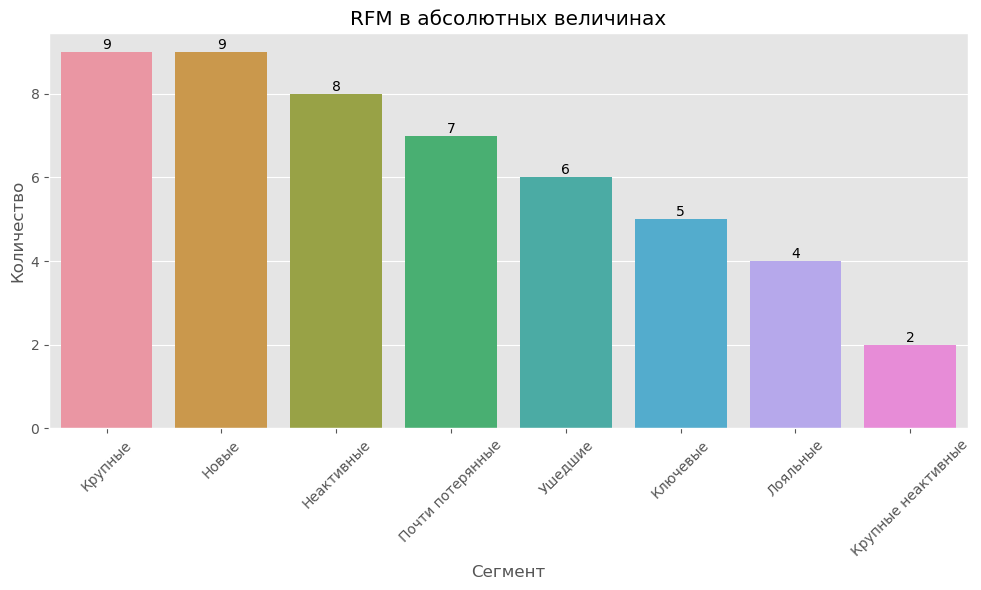

In [26]:
# Подсчитываем количество каждого сегмента
top = rfm_data['segment'].value_counts()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top.index, y=top.values)

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), '{:,.0f}'.format(p.get_height()), ha='center', va='bottom')

plt.title('RFM в абсолютных величинах')
plt.xlabel('Сегмент')
plt.ylabel('Количество')
plt.xticks(rotation=45)  # Поворачиваем метки на оси x на 45 градусов для улучшения читаемости
plt.tight_layout()

plt.show()

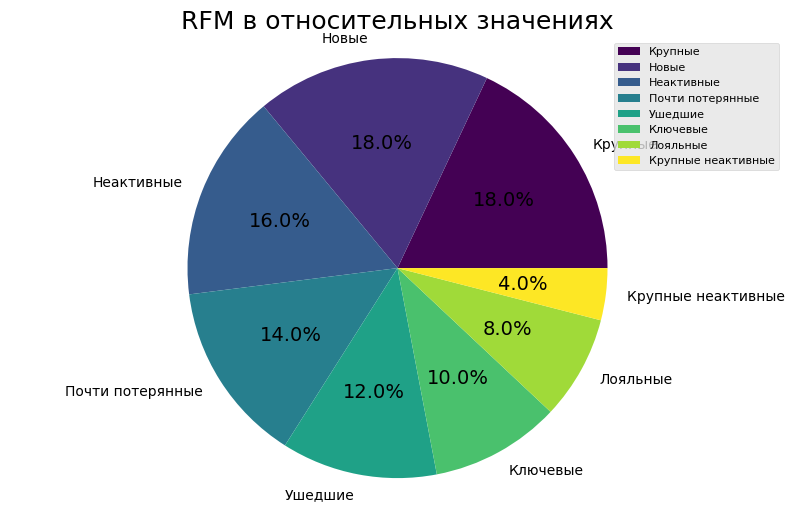

In [27]:
segment_counts = rfm_data['segment'].value_counts()

colors = plt.cm.viridis(np.linspace(0, 1, len(segment_counts)))

plt.figure(figsize=(10, 6))

patches, texts, autotexts = plt.pie(segment_counts.values, labels=segment_counts.index, autopct='%1.1f%%', colors=colors)

plt.title('RFM в относительных значениях', fontsize=18)
plt.axis('equal') 

plt.legend(patches, segment_counts.index, loc='best', fontsize=8)

for text in autotexts:
    text.set_horizontalalignment('center')
    text.set_verticalalignment('center')
    text.set_fontsize(14)
    
plt.show()

Выводы по результатам RFM анализа:

1. Крупные (9 клиентов): Это клиенты, которые совершили большие покупки в недавнем прошлом. Они представляют большую ценность для бизнеса, и их следует стимулировать на дальнейшие покупки.

2. Новые (9 клиентов): Это клиенты, которые недавно совершили покупки. Их следует мотивировать на повторные покупки, чтобы они стали постоянными клиентами.

3. Неактивные (8 клиентов): Это клиенты, которые давно не совершали покупки. Необходимо разработать стратегии для повторного привлечения этих клиентов.

4. Почти потерянные (7 клиентов): Это клиенты, которые редко совершают покупки и тратят мало. Они находятся на грани ухода, и их следует стимулировать на дальнейшие покупки.

5. Ушедшие (6 клиентов): Это клиенты, которые больше не совершают покупки. Необходимо исследовать причины их ухода и попытаться вернуть их.

6. Ключевые (5 клиентов): Это самые ценные клиенты, которые часто совершают покупки и тратят много. Их следует удерживать и стимулировать на дальнейшие покупки.

7. Лояльные (4 клиента): Это клиенты, которые регулярно совершают покупки, но тратят не так много. Их следует стимулировать на увеличение объема покупок.

8. Крупные неактивные (2 клиента): Это клиенты, которые в прошлом совершали большие покупки, но сейчас неактивны. Необходимо разработать стратегии для повторного привлечения этих клиентов.